# Deep Convolutional Autoencoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist

epochs = 50

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 15s 250us/step - loss: 0.2155 - val_loss: 0.1639
Epoch 2/50
60000/60000 [==============================] - 12s 208us/step - loss: 0.1524 - val_loss: 0.1420
Epoch 3/50
60000/60000 [==============================] - 12s 204us/step - loss: 0.1393 - val_loss: 0.1334
Epoch 4/50
60000/60000 [==============================] - 12s 201us/step - loss: 0.1321 - val_loss: 0.1277
Epoch 5/50
60000/60000 [==============================] - 12s 200us/step - loss: 0.1272 - val_loss: 0.1239
Epoch 6/50
60000/60000 [==============================] - 12s 200us/step - loss: 0.1236 - val_loss: 0.1248
Epoch 7/50
60000/60000 [==============================] - 12s 201us/step - loss: 0.1210 - val_loss: 0.1170
Epoch 8/50
60000/60000 [==============================] - 12s 200us/step - loss: 0.1190 - val_loss: 0.1134
Epoch 9/50
60000/60000 [==============================] - 12s 201us/step - loss: 0.1170 - val_

In [2]:
# autoencoder.save("models/conv_autoencoder.h5")

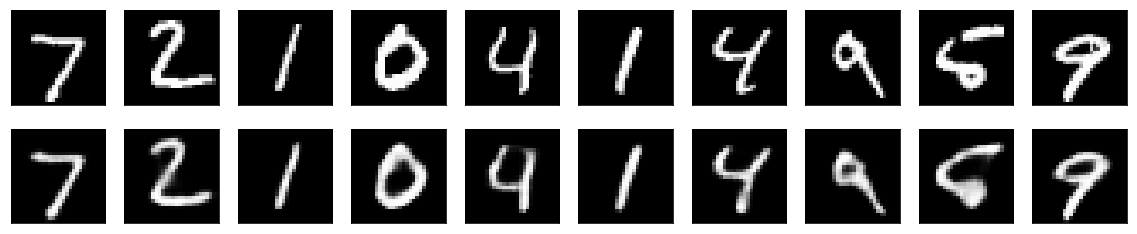

In [3]:
import matplotlib.pyplot as plt


decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()